### Worksheet 1

Please go to https://www.kaggle.com/fedesoriano/heart-failure-prediction and download the data set. Your task is to perform EDA on the dataset. Use “book1.ipynb” as a resource; remember, Google is your friend. Produce a Jupyter Notebook in which you complete the following tasks.

Assign the data to a dataframe. 
<br>
(a) use .head() to see the first few rows. Did you need to use index_col = 0?
<br>
(b) What variable types are present in the dataframe? (Hint, use .dtypes) Are there any missing values?

In [9]:
import pandas as pd
df = pd.read_csv('./heart.csv')
df.head()
# I did not have to use index_col = 0
df.dtypes 
# we have objects, int64, float64
df.info()
# we have no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Plot a histogram of the ages of the patients.

<Axes: xlabel='Age', ylabel='Count'>

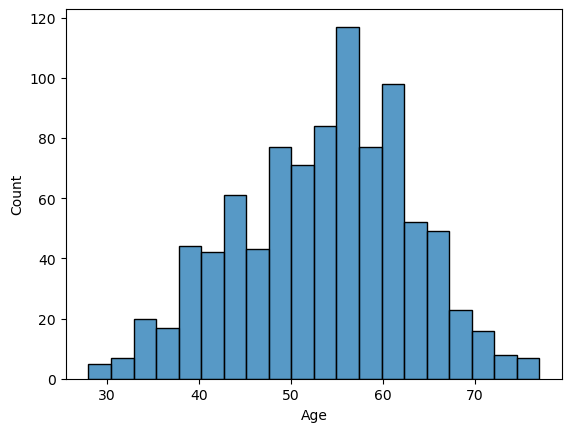

In [10]:
import seaborn as sns
sns.histplot(df['Age'], bins = 20)

Patient gender:
<br> (a) Use .value_counts() to determine number of males and females.
<br> (b) Calculate percentages of males and females

In [14]:
df['Sex'].value_counts()
# 725M, 193F, thus 918 total
# male percentage = 725/918*100% = 79%
# female percentage = 193/918*100% = 21%

Sex
M    725
F    193
Name: count, dtype: int64

Use .describe() to get a summary of the dataframe.

In [15]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Count the number of patients for each `ChestPainType`

In [16]:
df.groupby('ChestPainType').ChestPainType.count()

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
Name: ChestPainType, dtype: int64

How many patients have exercise induced angina?

In [20]:
df['ExerciseAngina'].value_counts()
# thus, 371 have exercise induced angina 

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Get a scatter plot of cholesterol vs. resting blood pressure.

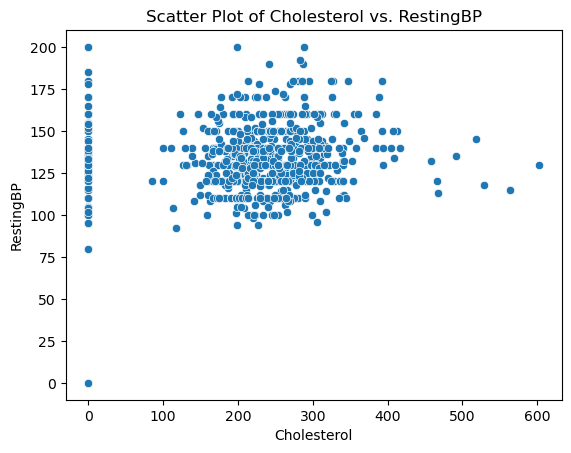

In [22]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Cholesterol', y='RestingBP', data=df)
plt.xlabel('Cholesterol')
plt.ylabel('RestingBP')
plt.title('Scatter Plot of Cholesterol vs. RestingBP')
plt.show()

Get a scatter plot of `age` vs. `MaxHR`. Give a red dot for female, a blue dot for male, and an ‘o’ (hollow circle) if no age is given in that row.

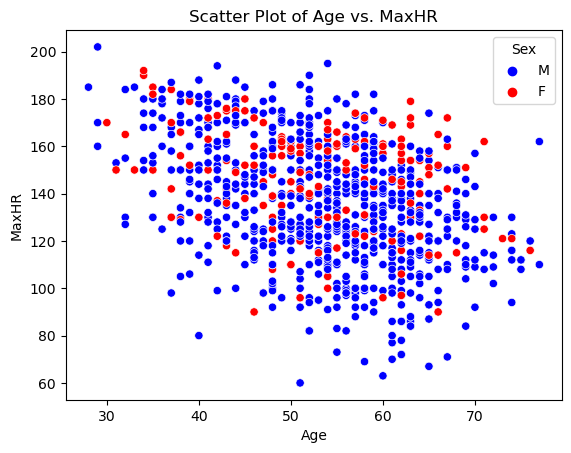

In [39]:
sns.scatterplot(x='Age', y='MaxHR', hue='Sex', style='Sex', data=df, markers={'M': 'o', 'F': 'o'}, palette={'M': 'blue', 'F': 'red'})
sns.scatterplot(x='Age', y='MaxHR', data=df[df['Age'].isna()], marker='o', color='white', edgecolor='black', s=100, label='No Age')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Scatter Plot of Age vs. MaxHR')
plt.show()

What is the average age of male patients? What is the average age of female patients?

In [23]:
df.groupby('Sex').Age.mean()
# average male age is roughly 54
# average female age is rougly 52.5

Sex
F    52.492228
M    53.782069
Name: Age, dtype: float64

For each age:
<br> (a) Count the number of males.
<br> (b) Count the number of females.

In [30]:
df.groupby(['Age', 'Sex']).size().unstack(fill_value=0)
# above line counts both males and females in same df 

Sex,F,M
Age,,
28,0,1
29,0,3
30,1,0
31,1,1
32,1,4
33,1,1
34,2,5
35,3,8
36,0,6


Get a waterfall graph of `ChestPainType` (like the last figure in W1-L3.ipynb.ipynb).

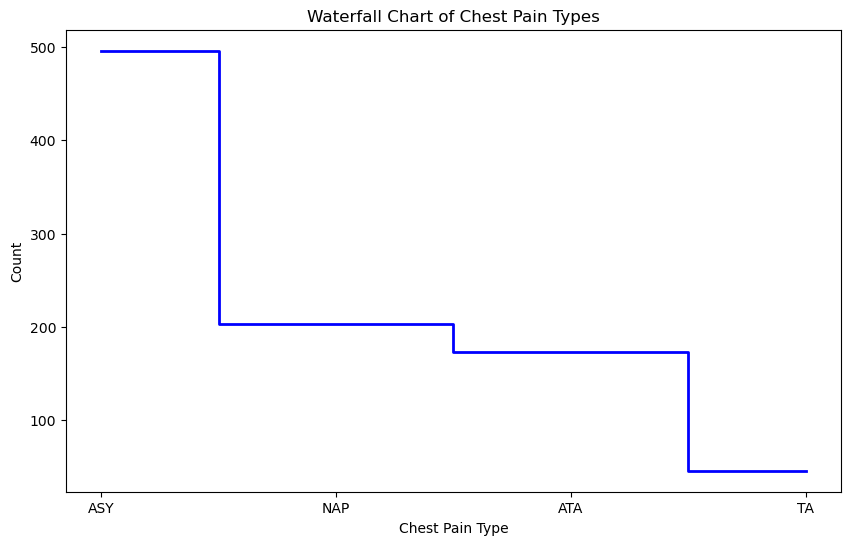

In [46]:
chest_pain_counts = df['ChestPainType'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
ax.step(chest_pain_counts.index, chest_pain_counts, where='mid', color='b', linewidth=2)
ax.set_xlabel('Chest Pain Type')
ax.set_ylabel('Count')
ax.set_title('Waterfall Chart of Chest Pain Types')
plt.show()

Extra credit: Produce an informative visualization of Age and ChestPainType, distinguishing between male and female patients.